# Import data from graphQL API

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import requests
import re
from nltk.tokenize import *
from nltk.corpus import stopwords
import string
import nltk

from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import json

filename = '../text_files/cabindao_proposals.json'
filename1 = '../text_files/forefront_proposals.json'
filename2 = '../text_files/gitcoin_proposals.json'
filename3 = '../text_files/giveth_proposals.json'
filename4 = '../text_files/goldfinch_proposals.json'
filename5 = '../text_files/moss_proposals.json'
filename6 = '../text_files/oceanprotocol_proposals.json'
filename7 = '../text_files/poh_proposals.json'
filename8 = '../text_files/primedao_proposals.json'
filename9 = '../text_files/protein_proposals.json'
filename10 = '../text_files/thedreamdao_proposals.json'
filename11 = '../text_files/vitadao_proposals.json'


df = json.load(open(filename))
df1 = json.load(open(filename1))
df2 = json.load(open(filename2))
df3 = json.load(open(filename3))
df4 = json.load(open(filename4))
df5 = json.load(open(filename5))
df6 = json.load(open(filename6))
df7 = json.load(open(filename7))
df8 = json.load(open(filename8))
df9 = json.load(open(filename9))
df10 = json.load(open(filename10))
df11 = json.load(open(filename11))


In [3]:
df = pd.DataFrame(df)
df1 = pd.DataFrame(df1)
df2 = pd.DataFrame(df2)
df3 = pd.DataFrame(df3)
df4 = pd.DataFrame(df4)
df5 = pd.DataFrame(df5)
df6 = pd.DataFrame(df6)
df7 = pd.DataFrame(df7)
df8 = pd.DataFrame(df8)
df9 = pd.DataFrame(df9)
df10 = pd.DataFrame(df10)
df11 = pd.DataFrame(df11)


In [4]:
dft = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])
dft

,id,title,body,choices,start,end,snapshot,state,author,space
0,0x723b0271dac3c935a4516d3a30eee88f739134581b7f...,Community Guild Season 3 Proposal,## Purpose of the Guild\n\nThe Community Guild...,"[Hell Yes, Nah]",1649886711,1650437940,14579577,closed,0xb361356B0fc3E0805cf5eF4316EE4822a28A55D2,"{'id': 'cabindao.eth', 'name': 'Cabin'}"
1,QmTXH4tDTYJPRkgP7SSrKyJt1RoyqQKNvHNMiKyFdQW4of,Meta Guild Season 3 Budget,The mission of the Meta Guild is to progressiv...,"[Yes, No]",1649876400,1650437940,14579645,closed,0x029EE42d381C9809493F34095235843625E46676,"{'id': 'cabindao.eth', 'name': 'Cabin'}"
2,Qmdf3s3Tst7qz9UMGU7xnTApz5XL4ownLinkMCMrWLTBBg,Placemaker's Guild Budget Season 3,## Purpose of the Guild\nThe Placemakers brin...,"[Hell ya, chainsaw vroom vroom, Nope]",1649876400,1650437940,14579058,closed,0x029EE42d381C9809493F34095235843625E46676,"{'id': 'cabindao.eth', 'name': 'Cabin'}"
3,0xf60ea06403dc0ee1b97f5a32c6e68078048b6db43492...,Product Guild Season 3 Proposal,## Purpose of the Guild\nThe objective of the ...,"[Hell Yes, No]",1649878817,1650394800,14579045,closed,0xC3268DDB8E38302763fFdC9191FCEbD4C948fe1b,"{'id': 'cabindao.eth', 'name': 'Cabin'}"
4,0x763660531cd9af77a426e5828542a8dda3204332bc55...,Media Guild Season 3 Proposal,\n## Purpose of the Guild\n\nThe mission of th...,"[Hell Yes, No]",1649876400,1650437940,14578868,closed,0xB91833386627cb178D99fEbad89236E35C0AD43f,"{'id': 'cabindao.eth', 'name': 'Cabin'}"
...,...,...,...,...,...,...,...,...,...,...
24,0x92b6d72a4416139cdecc462ec839e67fba103542387d...,VDP-5 Scheibye-Knudsen Lab Funding,***NOTE:** This is a duplicate of an [on chain...,"[For, Against, Abstain]",1640757000,1640760600,13898045,closed,0x51AaE7357c8baD10DB3532e9AC597efFA5C3820f,"{'id': 'vote.vitadao.eth', 'name': 'VitaDAO'}"
25,0xcf2d12681ff2f4ae59fe15d153c6b189e0501b2ea9ce...,VDP-4 VitaDAO Treasury + LP Proposal,***NOTE:** This is a duplicate of an [on chain...,"[For, Against, Abstain]",1640757000,1640760600,13897952,closed,0x51AaE7357c8baD10DB3532e9AC597efFA5C3820f,"{'id': 'vote.vitadao.eth', 'name': 'VitaDAO'}"
26,0x6c45b369159baee1babb8ec65d35e46eb2b0df6a383c...,VDP-3 VitaDAO Tokenomics,***NOTE:** This is a duplicate of an [on chain...,"[For, Against, Abstain]",1640757000,1640760600,13897897,closed,0x51AaE7357c8baD10DB3532e9AC597efFA5C3820f,"{'id': 'vote.vitadao.eth', 'name': 'VitaDAO'}"
27,0xe524ef31eee791a8fe1f100dfc9c60fd5ae1b32b5056...,VDP-2 VitaDAO Incentive Proposal,***NOTE:** This is a duplicate of an [on chain...,"[For, Against, Abstain]",1640757000,1640760600,13897668,closed,0x51AaE7357c8baD10DB3532e9AC597efFA5C3820f,"{'id': 'vote.vitadao.eth', 'name': 'VitaDAO'}"


In [5]:
dft.shape

(415, 10)

## Tokenizing for the topic modelling

In [6]:
def clean_tokens(text, language):
    
    from nltk.corpus import stopwords
    all_stopwords_gensim = STOPWORDS.union(set(['https', 'proposal', 'Proposal', 'PROPOSAL', 'dao','s', 'will']))
    
    words = [w for w in [word for word in [w.lower() for w in word_tokenize(text)] if word.isalpha()] if not w in STOPWORDS.union(set(['https', 'proposal', 'Proposal', 'PROPOSAL', 'dao','s', 'will']))]
    
    return words

In [7]:
dft['clean_title'] = dft['title'].apply(lambda x: clean_tokens(x, 'english'))

In [8]:
dft['clean_body'] = dft['body'].apply(lambda x: clean_tokens(x, 'english'))

## Removing extra characters and turning into strings for wordclouds

In [9]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,
    remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) #remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove urls, https
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text) #get rid of digits, ie numbers
    return text

In [10]:
dft['clean_title2'] = dft['title'].apply(lambda x: clean_text(x))

In [11]:
dft['clean_body2'] = dft['body'].apply(lambda x: clean_text(x))

In [12]:
dft['tok_title'] = dft['clean_title2'].apply(lambda x:  nltk.word_tokenize(x))

In [13]:
dft['tok_body'] = dft['clean_body2'].apply(lambda x:  nltk.word_tokenize(x))

In [14]:
dft['tok_body']

0     [purpose, of, the, guildthe, community, guild,...
1     [the, mission, of, the, meta, guild, is, to, p...
2     [purpose, of, the, guildthe, placemakers, brin...
3     [purpose, of, the, guildthe, objective, of, th...
4     [purpose, of, the, guildthe, mission, of, the,...
                            ...                        
24    [note, this, is, a, duplicate, of, an, from, p...
25    [note, this, is, a, duplicate, of, an, from, p...
26    [note, this, is, a, duplicate, of, an, from, p...
27    [note, this, is, a, duplicate, of, an, from, p...
28    [note, this, is, a, duplicate, of, an, from, p...
Name: tok_body, Length: 415, dtype: object

### Which daos mention the word community in their proposals?

In [15]:
community = dft.loc[dft['body'].str.contains('community')]

community

,id,title,body,choices,start,end,snapshot,state,author,space,clean_title,clean_body,clean_title2,clean_body2,tok_title,tok_body
0,0x723b0271dac3c935a4516d3a30eee88f739134581b7f...,Community Guild Season 3 Proposal,## Purpose of the Guild\n\nThe Community Guild...,"[Hell Yes, Nah]",1649886711,1650437940,14579577,closed,0xb361356B0fc3E0805cf5eF4316EE4822a28A55D2,"{'id': 'cabindao.eth', 'name': 'Cabin'}","[community, guild, season]","[purpose, guild, community, guild, cultural, b...",community guild season proposal,purpose of the guildthe community guild is th...,"[community, guild, season, proposal]","[purpose, of, the, guildthe, community, guild,..."
4,0x763660531cd9af77a426e5828542a8dda3204332bc55...,Media Guild Season 3 Proposal,\n## Purpose of the Guild\n\nThe mission of th...,"[Hell Yes, No]",1649876400,1650437940,14578868,closed,0xB91833386627cb178D99fEbad89236E35C0AD43f,"{'id': 'cabindao.eth', 'name': 'Cabin'}","[media, guild, season]","[purpose, guild, mission, media, guild, larp, ...",media guild season proposal,purpose of the guildthe mission of the media ...,"[media, guild, season, proposal]","[purpose, of, the, guildthe, mission, of, the,..."
5,QmX5ezs9wp53f2AixLMDLLPdppYTtDMMMCtxoCVqj53yy3,Governance proposal: Expand Phil’s role,\nThis is an addendum to my current role as Pl...,"[Hell yes, No]",1646163096,1646744400,14314819,closed,0x029EE42d381C9809493F34095235843625E46676,"{'id': 'cabindao.eth', 'name': 'Cabin'}","[governance, expand, phil, role]","[addendum, current, role, placemaker, proposin...",governance proposal expand phil’s role,this is an addendum to my current role as plac...,"[governance, proposal, expand, phil, ’, s, role]","[this, is, an, addendum, to, my, current, role..."
8,0x65c935b43072d8ee7c3852777add51ac07e6e4d78d0a...,Should we approve a 639₡ and $750 USDC Communi...,The Community Guild facilitators (Jackson and ...,"[Hell Yes, No]",1643931300,1644276900,14135382,closed,0xb361356B0fc3E0805cf5eF4316EE4822a28A55D2,"{'id': 'cabindao.eth', 'name': 'Cabin'}","[approve, usdc, community, guild, budget, seas...","[community, guild, facilitators, jackson, jond...",should we approve a ₡ and usdc community guil...,the community guild facilitators jackson and j...,"[should, we, approve, a, ₡, and, usdc, communi...","[the, community, guild, facilitators, jackson,..."
13,0xd1be1e1476a88e3ebfbcaa4d71e0514dd7b3baf6257b...,Contributor Role Proposal: Co-Community Builde...,Jon Dean and Jackson would like to propose co-...,"[Heck yes, No]",1641578400,1641837600,13959454,closed,0xC3268DDB8E38302763fFdC9191FCEbD4C948fe1b,"{'id': 'cabindao.eth', 'name': 'Cabin'}","[contributor, role, builders, jon, dean, jackson]","[jon, dean, jackson, propose, community, build...",contributor role proposal cocommunity builders...,jon dean and jackson would like to propose coo...,"[contributor, role, proposal, cocommunity, bui...","[jon, dean, and, jackson, would, like, to, pro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0x92b6d72a4416139cdecc462ec839e67fba103542387d...,VDP-5 Scheibye-Knudsen Lab Funding,***NOTE:** This is a duplicate of an [on chain...,"[For, Against, Abstain]",1640757000,1640760600,13898045,closed,0x51AaE7357c8baD10DB3532e9AC597efFA5C3820f,"{'id': 'vote.vitadao.eth', 'name': 'VitaDAO'}","[lab, funding]","[note, duplicate, chain, readcontract, prior, ...",scheibyeknudsen lab funding,note this is a duplicate of an from prior to ...,"[scheibyeknudsen, lab, funding]","[note, this, is, a, duplicate, of, an, from, p..."
25,0xcf2d12681ff2f4ae59fe15d153c6b189e0501b2ea9ce...,VDP-4 VitaDAO Treasury + LP Proposal,***NOTE:** This is a duplicate of an [on chain...,"[For, Against, Abstain]",1640757000,1640760600,13897952,closed,0x51AaE7357c8baD10DB3532e9AC597efFA5C3820f,"{'id': 'vote.vitadao.eth', 'name': 'VitaDAO'}","[vitadao, treasury, lp]","[note, duplicate, chain, readcontract, prior, ...",vitadao treasury lp proposal,note this is a duplicate of an from prior to ...,"[vitadao, treasury, lp, pr

In [16]:
community.space.value_counts()

{'id': 'officialoceandao.eth', 'name': 'OceanDAO'}             141
{'id': 'vote.vitadao.eth', 'name': 'VitaDAO'}                   23
{'id': 'gitcoindao.eth', 'name': 'Gitcoin'}                     21
{'id': 'poh.eth', 'name': 'Proof Of Humanity'}                  21
{'id': 'cabindao.eth', 'name': 'Cabin'}                         14
{'id': 'ffdao.eth', 'name': 'forefront'}                         7
{'id': 'proteincommunity.eth', 'name': 'Protein Community'}      7
{'id': 'goldfinch.eth', 'name': 'Goldfinch'}                     6
{'id': 'thedreamdao.eth', 'name': 'Dream DAO'}                   6
{'id': 'primexyz.eth', 'name': 'PrimeDAO'}                       5
{'id': 'giv.eth', 'name': 'Giveth'}                              1
{'id': 'moss-earth.eth', 'name': 'moss.earth'}                   1
Name: space, dtype: int64

<AxesSubplot:>

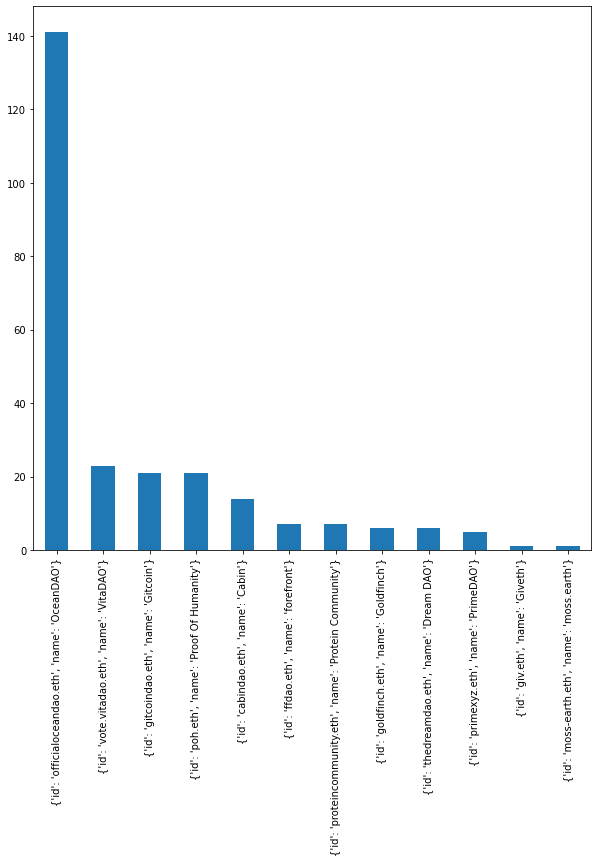

In [17]:
community.space.value_counts().plot.bar(y='mentioned', figsize=(10, 10))

## Wordclouds

In [18]:
from wordcloud import WordCloud

In [19]:
title = dft['clean_title2']
body = dft['clean_body2']

In [20]:
titlew = " ".join(title)
titlew = titlew.replace('proposal', '')
titlew = titlew.replace('dao', '')

In [21]:
bodyw = " ".join(body)
bodyw = bodyw.replace('proposal', '')
bodyw = bodyw.replace('dao', '')
bodyw = bodyw.replace("’s",'')
bodyw = bodyw.replace("'s",'')
bodyw = bodyw.replace("will",'')

In [22]:
bodyw = bodyw.replace(" s",'')

In [23]:
bodyw

' purpose of the guildthe community guild is the cultural backbone of the  we onboard new members facilitate events irl and url connect members to resources hostocial clubs lead dynamic programming and help people find the projects that bestuit their interestskillsets and passions beyond leading onboarding our guild focus  be to curate a lively and fun vibealigned culture by hosting irl and url events fostering a collaborative work environment facilitating connections and moderating the community and its constantly growing needs  who erve on the city council representing the guildjon dean what are the guilds goals for theeason what metrics  the guild trackthe community guild isupporting three quests this  lead weekly orientation calls and iterate on our onboarding  build a datadriven deij action planpecific to cabin that can be implemented foreason  encourage  maintain good discord hygiene  crosspollination of information  context across guildseach quest has an objective with affiliate

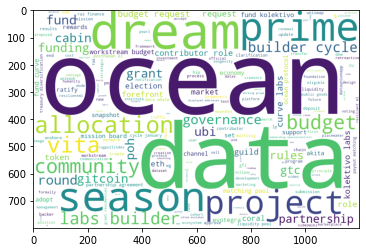

In [24]:
wordcloud1 = WordCloud(background_color='white',width=1200,height=800)
wordcloud1.generate(titlew)

plt.imshow(wordcloud1)

In [25]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 140 #int(360.0 * 46.0 / 255.0)
    s = 7 #int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

In [26]:
font_path = '../style_and_formatting/DM_Sans/DMSans-Regular.ttf'

In [27]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [30]:
mask = np.array(Image.open('../style_and_formatting/images_presentation/circle.jpeg'))
mask

array([[255, 255, 255, ..., 222, 255, 255],
       [255, 255, 255, ..., 222, 255, 255],
       [255, 255, 255, ..., 222, 255, 255],
       ...,
       [227, 227, 227, ..., 251, 235, 226],
       [255, 255, 255, ..., 235, 250, 255],
       [255, 255, 255, ..., 227, 255, 255]], dtype=uint8)

In [29]:
def transform_zeros(val):
    if val == 0:
        return 255
    else:
        return val

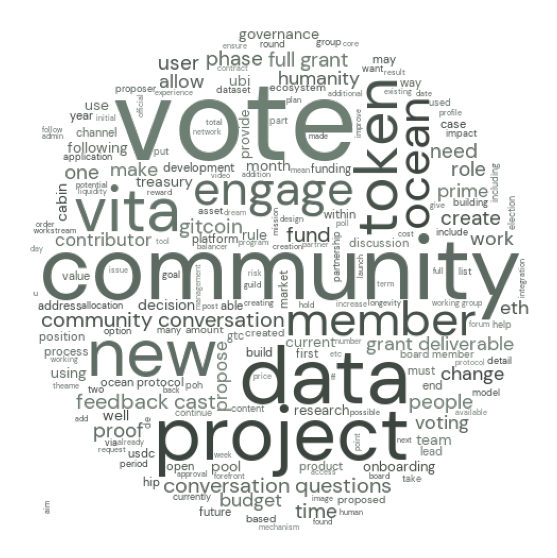

In [31]:
wordcloud1 = WordCloud(width=1200, height=800, color_func = random_color_func, font_path=font_path, mask=mask,  mode = "RGBA", background_color=None)
wordcloud1.generate(bodyw)

plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wordcloud1)
#plt.savefig('impactdaos_clean_circle.png', transparent=True)


# Language detection


In [34]:
from langdetect import detect

def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [35]:
%%time

dft['language'] = dft['clean_body2'].apply(language_detection)


#dft.to_csv('impactdaos_lang_processed.csv', index=False)

CPU times: user 2.74 s, sys: 17.8 ms, total: 2.76 s
Wall time: 2.77 s


In [ ]:
#df = pd.read_csv('../datasets/impactdaos_lang_processed.csv')

In [36]:
dft.language.unique()

array(['en', 'it', None, 'es', 'zh-cn', 'et'], dtype=object)

In [37]:
dft.language.value_counts()

en       407
es         2
it         1
zh-cn      1
et         1
Name: language, dtype: int64

# Topic modelling

In [38]:
import gensim
from gensim import corpora

In [39]:
dictionary = corpora.Dictionary(dft['clean_body'])
#dictionary.save('dictionary.dict')
dictionary

In [40]:
dictionary.token2id

{'achieved': 0,
 'across': 1,
 'action': 2,
 'actionable': 3,
 'activation': 4,
 'addition': 5,
 'admission': 6,
 'affiliated': 7,
 'ahead': 8,
 'alone': 9,
 'another': 10,
 'answered': 11,
 'approach': 12,
 'asynchronous': 13,
 'attending': 14,
 'backbone': 15,
 'badges': 16,
 'best': 17,
 'beyond': 18,
 'biweekly': 19,
 'born': 20,
 'bounties': 21,
 'bounty': 22,
 'brainchild': 23,
 'budget': 24,
 'build': 25,
 'building': 26,
 'built': 27,
 'cabin': 28,
 'call': 29,
 'calls': 30,
 'campfires': 31,
 'centralized': 32,
 'chat': 33,
 'city': 34,
 'clarity': 35,
 'class': 36,
 'clear': 37,
 'closed': 38,
 'clubs': 39,
 'coherent': 40,
 'collaborative': 41,
 'community': 42,
 'competitive': 43,
 'complete': 44,
 'completed': 45,
 'completing': 46,
 'conduct': 47,
 'congrats': 48,
 'connect': 49,
 'connected': 50,
 'connections': 51,
 'constantly': 52,
 'context': 53,
 'contributed': 54,
 'contributor': 55,
 'contributors': 56,
 'coordination': 57,
 'core': 58,
 'council': 59,
 'create': 

In [41]:
for item in dft['clean_body']:
    print(dictionary.doc2bow(item))

[(0, 5), (1, 2), (2, 2), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 3), (26, 1), (27, 1), (28, 8), (29, 2), (30, 7), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 13), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 2), (59, 2), (60, 4), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 4), (74, 1), (75, 1), (76, 1), (77, 1), (78, 4), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 1), (85, 1), (86, 3), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 5), (96, 2), (97, 1), (98, 2), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 2), (108, 1), (109, 1), (110, 4)

In [42]:
#covert into matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in dft['clean_body']]

In [43]:
for word_id, count in doc_term_matrix[11]:
    print(word_id,dictionary[word_id])
    print('--------')

35 clarity
--------
66 current
--------
94 event
--------
129 hold
--------
171 make
--------
186 need
--------
187 needs
--------
254 strategy
--------
269 two
--------
276 usdc
--------
343 weeks
--------
360 currently
--------
396 likely
--------
459 value
--------
634 note
--------
734 full
--------
760 cover
--------
807 treasury
--------
825 medium
--------
866 provide
--------
872 term
--------
873 terms
--------
880 diversification
--------
881 dollar
--------
882 eth
--------
883 fluctuated
--------
884 liquidity
--------
885 near
--------
886 play
--------
887 price
--------
888 purchase
--------
889 require
--------
890 sense
--------
891 shared
--------
892 sided
--------
893 sufficient
--------
894 takes
--------
895 though
--------


In [44]:
corpora.MmCorpus.serialize('corpus_s.mm', doc_term_matrix)

print(len(doc_term_matrix))
df1.shape

415


(9, 10)

In [45]:
Lda = gensim.models.ldamodel.LdaModel

In [46]:
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, 
               passes=50)

In [47]:
ldamodel.save('proposal_topics_impact.model')

In [48]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel =  Lda.load('proposal_topics_impact.model')

In [49]:
ldamodel.print_topics()

[(0,
  '0.012*"community" + 0.007*"address" + 0.007*"character" + 0.006*"one" + 0.005*"vote" + 0.005*"governance" + 0.005*"autophagy" + 0.005*"support" + 0.004*"poh" + 0.004*"snapshot"'),
 (1,
  '0.009*"gitcoin" + 0.008*"community" + 0.007*"guild" + 0.007*"de" + 0.006*"cabin" + 0.006*"season" + 0.006*"treasury" + 0.005*"budget" + 0.005*"members" + 0.005*"projects"'),
 (2,
  '0.009*"snapshot" + 0.009*"ubi" + 0.006*"new" + 0.006*"humanity" + 0.006*"proof" + 0.006*"token" + 0.005*"community" + 0.005*"prime" + 0.005*"primedao" + 0.005*"vote"'),
 (3,
  '0.019*"data" + 0.017*"ocean" + 0.013*"community" + 0.011*"click" + 0.010*"grant" + 0.009*"vote" + 0.008*"feedback" + 0.008*"questions" + 0.008*"cast" + 0.008*"full"'),
 (4,
  '0.011*"vote" + 0.009*"board" + 0.008*"vitadao" + 0.007*"data" + 0.007*"community" + 0.006*"election" + 0.006*"rules" + 0.006*"working" + 0.005*"post" + 0.005*"steward"')]

In [50]:
topics = ldamodel.print_topics(num_words=5, num_topics=20)

In [51]:
for i in topics:
    print('Topic number {} \n'.format(i[0]))
    for j in i: 
        print (j)
        print('......................')

Topic number 0 

0
......................
0.012*"community" + 0.007*"address" + 0.007*"character" + 0.006*"one" + 0.005*"vote"
......................
Topic number 1 

1
......................
0.009*"gitcoin" + 0.008*"community" + 0.007*"guild" + 0.007*"de" + 0.006*"cabin"
......................
Topic number 2 

2
......................
0.009*"snapshot" + 0.009*"ubi" + 0.006*"new" + 0.006*"humanity" + 0.006*"proof"
......................
Topic number 3 

3
......................
0.019*"data" + 0.017*"ocean" + 0.013*"community" + 0.011*"click" + 0.010*"grant"
......................
Topic number 4 

4
......................
0.011*"vote" + 0.009*"board" + 0.008*"vitadao" + 0.007*"data" + 0.007*"community"
......................


In [52]:
ldamodel.show_topic(0,10)

[('community', 0.011931325),
 ('address', 0.0074180057),
 ('character', 0.006642526),
 ('one', 0.0055458946),
 ('vote', 0.00537403),
 ('governance', 0.0049940962),
 ('autophagy', 0.004733691),
 ('support', 0.004596928),
 ('poh', 0.0041341805),
 ('snapshot', 0.004052008)]

In [53]:
first_topic_words = dict(ldamodel.show_topic(0,1000))
first_topic_words

{'community': 0.011931325,
 'address': 0.0074180057,
 'character': 0.006642526,
 'one': 0.0055458946,
 'vote': 0.00537403,
 'governance': 0.0049940962,
 'autophagy': 0.004733691,
 'support': 0.004596928,
 'poh': 0.0041341805,
 'snapshot': 0.004052008,
 'phase': 0.0039389394,
 'workstream': 0.0037023055,
 'allow': 0.0032928884,
 'login': 0.003230882,
 'proposals': 0.0030491108,
 'voting': 0.0029525529,
 'gtc': 0.0029312167,
 'vita': 0.0029098976,
 'ff': 0.002887196,
 'characters': 0.0028295605,
 'proof': 0.0027853216,
 'budget': 0.0027349563,
 'gitcoin': 0.00269528,
 'total': 0.0026591036,
 'season': 0.0026329402,
 'humanity': 0.0025740466,
 'current': 0.0024827942,
 'propose': 0.002478895,
 'following': 0.0024762223,
 'treasury': 0.002429188,
 'cryptoauth': 0.002428147,
 'abcd': 0.0024281465,
 'time': 0.002418255,
 'working': 0.0023712807,
 'profile': 0.0023655316,
 'add': 0.0023433834,
 'able': 0.0023304648,
 'displayed': 0.0023278855,
 'additional': 0.0022896684,
 'new': 0.0022789526

## Model visualization

In [54]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary)

/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py

In [55]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.172356 -0.093933       1        1  27.786645
2     -0.092910  0.012800       2        1  23.394426
1     -0.098763 -0.040118       3        1  22.751232
0     -0.065295 -0.021065       4        1  15.351371
4      0.084611  0.142315       5        1  10.716326, topic_info=              Term        Freq       Total Category  logprob  loglift
3419         ocean  265.000000  265.000000  Default  30.0000  30.0000
68            data  347.000000  347.000000  Default  29.0000  29.0000
3401         click  175.000000  175.000000  Default  28.0000  28.0000
4790           ubi  111.000000  111.000000  Default  27.0000  27.0000
935          board  144.000000  144.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
179        members   20.301209  172.783847   Topic5  -5.6593   0.0920
675       snapshot   20.803603  200.180070   Topic5  -5.6349  -0.0307
1535       funding   18.243941  120.322561   Topic5  -5.7662   0.3471
734           full   19.242329  187.341463   Topic5  -5.7129  -0.0424
2262  deliverables   18.059132  129.104789   Topic5  -5.7763   0.2664

[357 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4812      4  0.954022    abcd
4191      1  0.937563      ad
917       2  0.242772  adding
917       4  0.194218  adding
917       5  0.582654  adding
...     ...       ...     ...
1389      1  0.022938     yes
1389      2  0.068813     yes
1389      3  0.711067     yes
1389      4  0.183501     yes
1389      5  0.022938     yes

[676 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1, 5])

Wordclouds visualizations

In [56]:
first_topic_words = dict(ldamodel.show_topic(0,1000))
second_topic_words = dict(ldamodel.show_topic(1,1000))
third_topic_words = dict(ldamodel.show_topic(2,1000))
fourth_topic_words = dict(ldamodel.show_topic(3,1000))
five_topic_words = dict(ldamodel.show_topic(4,1000))

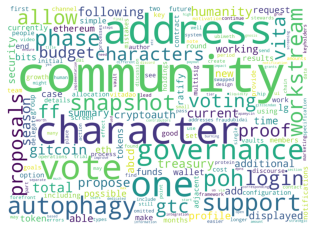

In [57]:
firstcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='white',
                        width=2500,
                        height=1800
                         ).generate_from_frequencies(first_topic_words)
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

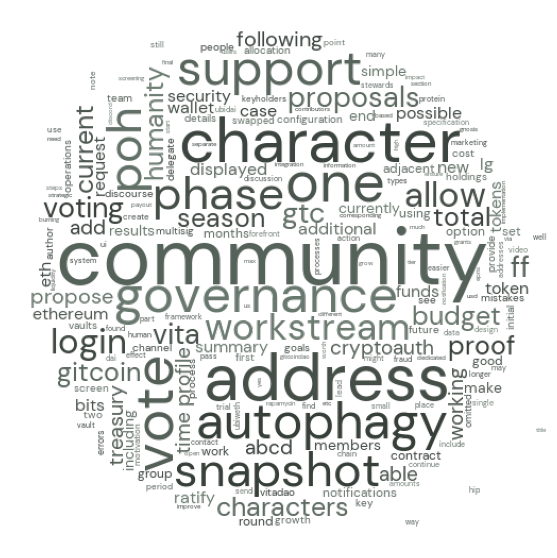

In [58]:
cloud1 = WordCloud(stopwords=STOPWORDS, width=1200, height=800, color_func = random_color_func, mask=mask, font_path=font_path, mode = "RGBA", background_color=None)
cloud1.generate_from_frequencies(first_topic_words)

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(cloud1)

plt.savefig('social.png', transparent=True)


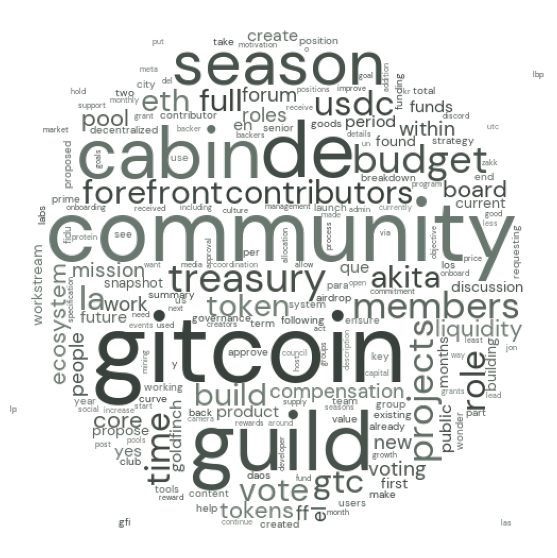

In [59]:
cloud2 = WordCloud(stopwords=STOPWORDS, width=1200, height=800, color_func = random_color_func, mask=mask, font_path=font_path, mode = "RGBA", background_color=None)
cloud2.generate_from_frequencies(second_topic_words)

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(cloud2)

plt.savefig('experience.png', transparent=True)


In [60]:
del third_topic_words['la']
del third_topic_words['de']
del third_topic_words['el']
del third_topic_words['que']
del third_topic_words['click']
del third_topic_words['en']
del third_topic_words['los']
del third_topic_words['para']

KeyError: 'la'

In [ ]:
cloud3 = WordCloud(stopwords=STOPWORDS, width=1200, height=800, color_func = random_color_func, mask=mask, font_path=font_path, mode = "RGBA", background_color=None)
cloud3.generate_from_frequencies(third_topic_words)

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(cloud3)

plt.savefig('comm_spanish.png', transparent=True)


In [ ]:
cloud4 = WordCloud(stopwords=STOPWORDS, width=1200, height=800, color_func = random_color_func, mask=mask, font_path=font_path, mode = "RGBA", background_color=None)
cloud4.generate_from_frequencies(fourth_topic_words)

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(cloud4)

plt.savefig('coordination.png', transparent=True)



In [ ]:
del five_topic_words['gitcoin']
del five_topic_words['vitadao']


In [ ]:
cloud5 = WordCloud(stopwords=STOPWORDS, width=1200, height=800, color_func = random_color_func, mask=mask, font_path=font_path, mode = "RGBA", background_color=None)
cloud5.generate_from_frequencies(five_topic_words)

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(cloud5)
plt.savefig('health.png', transparent=True)

## Model evaluation

In [64]:
import importlib

In [65]:
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))  


Perplexity:  -7.901002913218379
